In [3]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import statsmodels.api as sm

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


Example:  A manufacturer of paper used for making grocery bags is interested in improving the tensile strength of the product. Product engineering thinks that tensile strength is a function of the hardwood concentration in the pulp and that the range of hardwood concentrations of practical interest is between 5 and 20%. A team of engineers responsible for the study decides to investigate four levels of hardwood concentration: 5, 10, 15, and 20%. They decide to make up six test specimens at each concentration level, using a pilot plant. All 24 specimens are tested on a laboratory tensile tester, in random order. 

In [4]:
Five=pd.Series([7,8,15,11,9,10],name="5")
Ten=pd.Series([12,17,13,18,19,15],name="10")
Fifteen=pd.Series([14,18,19,17,16,18],name="15")
Twenty=pd.Series([19,25,22,23,18,20],name="20")

In [5]:
# create a pandas dataframe of the name of df; axis=1 is for columns
df=pd.concat([Five,Ten,Fifteen,Twenty],axis='columns')
df

,5,10,15,20
0,7,12,14,19
1,8,17,18,25
2,15,13,19,22
3,11,18,17,23
4,9,19,16,18
5,10,15,18,20


In [6]:
# summarize the  data and describe
df.describe()

,5,10,15,20
count,6.000000,6.000000,6.000000,6.000000
mean,10.000000,15.666667,17.000000,21.166667
std,2.828427,2.804758,1.788854,2.639444
min,7.000000,12.000000,14.000000,18.000000
25%,8.250000,13.500000,16.250000,19.250000
50%,9.500000,16.000000,17.500000,21.000000
75%,10.750000,17.750000,18.000000,22.750000
max,15.000000,19.000000,19.000000,25.000000


Text(33.722222222222214, 0.5, 'strength')

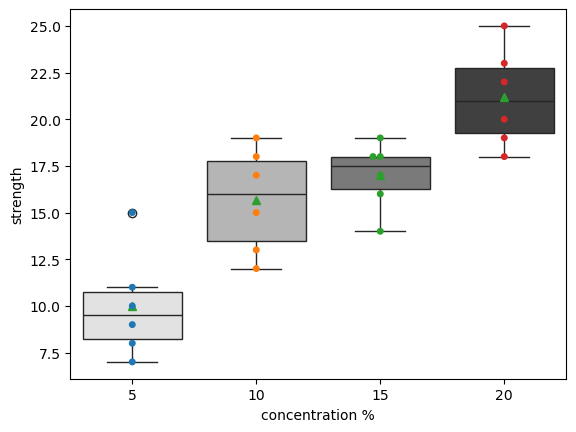

In [7]:
# Plot the data to visualize
ax=sns.boxplot(data=df,showmeans=True,palette="Greys")
ax=sns.swarmplot(data=df)
plt.xlabel("concentration %")
plt.ylabel("strength")

Text(0.5, 9.444444444444438, 'strength')

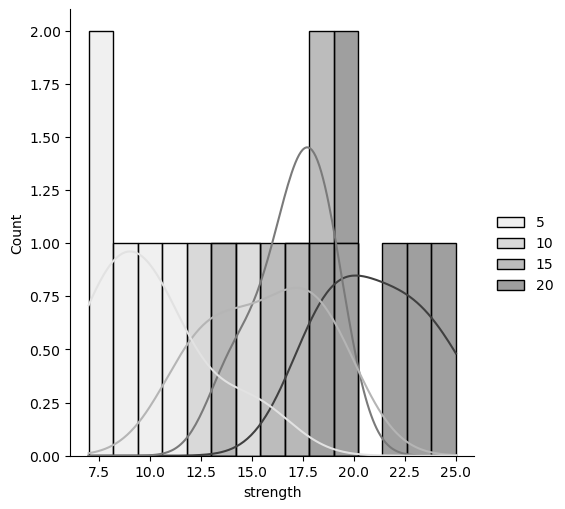

In [8]:
# take a look at the distributions as well
sns.displot(df,palette="Greys",bins=15,kde=True,stat="count")
plt.xlabel("strength")

In [9]:
# review the assumptions for ANOVA

In [10]:
scipy.stats.levene(df["5"],df["10"],df["15"],df["20"])

LeveneResult(statistic=0.5988455988455988, pvalue=0.6231941028644978)

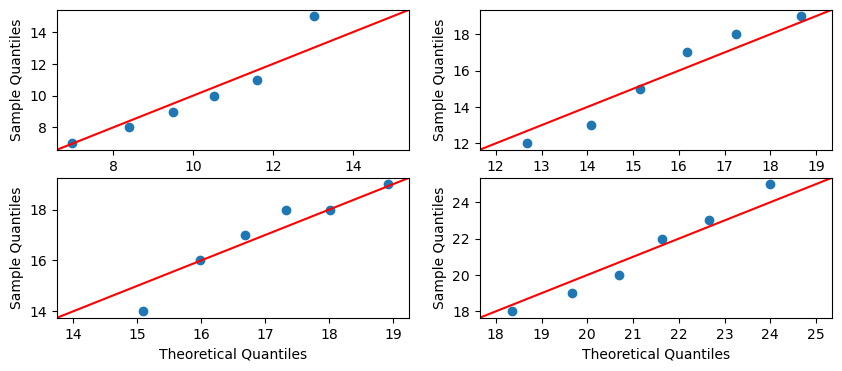

In [11]:
df["5"].sort_values()
df["10"].sort_values()
df["15"].sort_values()
df["20"].sort_values()
fig2,ax2=plt.subplots(nrows=2,ncols=2,figsize=(10,4))
sm.qqplot(df["5"],line='45',loc=np.mean(df["5"]),scale=np.std(df["5"],ddof=1),ax=ax2[0,0])
sm.qqplot(df["10"],line='45',loc=np.mean(df["10"]),scale=np.std(df["10"],ddof=1),ax=ax2[0,1])
sm.qqplot(df["15"],line='45',loc=np.mean(df["15"]),scale=np.std(df["15"],ddof=1),ax=ax2[1,0])
sm.qqplot(df["20"],line='45',loc=np.mean(df["20"]),scale=np.std(df["20"],ddof=1),ax=ax2[1,1])
plt.show()

# Calculate the test statistic

In [12]:
Strengths=pd.Series([7,8,15,11,9,10,12,17,13,18,19,15,14,18,19,17,16,18,19,25,22,23,18,20],name="strengths")
Groups=pd.Series([5,5,5,5,5,5,10,10,10,10,10,10,15,15,15,15,15,15,20,20,20,20,20,20],name="groups")
Groups=Groups.astype("category")

In [13]:
group_means=df.mean()
group_means

5     10.000000
10    15.666667
15    17.000000
20    21.166667
dtype: float64

In [14]:
grand_mean=group_means.mean()
grand_mean

15.958333333333332

In [15]:
TotalSS=np.sum((Strengths-grand_mean)**2)
TotalSS

512.9583333333334

In [16]:
BetweenSS=np.sum(6*(group_means-grand_mean)**2)
BetweenSS

382.79166666666674

In [17]:
WithinSS_1=np.sum((df["5"]-df["5"].mean())**2)
WithinSS_2=np.sum((df["10"]-df["10"].mean())**2)
WithinSS_3=np.sum((df["15"]-df["15"].mean())**2)
WithinSS_4=np.sum((df["20"]-df["20"].mean())**2)

In [18]:
WithinSS=WithinSS_1+WithinSS_2+WithinSS_3+WithinSS_4
WithinSS

130.16666666666666

In [19]:
MSE= WithinSS/20
MSE

6.508333333333333

In [20]:
MST=BetweenSS/3
MST

127.59722222222224

In [21]:
F_statistic=MST/MSE
F_statistic

19.605206999573202

# Compare with F distribution for critical value comparison and p-value

In [22]:
from scipy.stats import f

In [23]:
f.ppf(0.99,3,20)

4.938193382310539

In [24]:
1-f.cdf(F_statistic,3,20)

3.5925782584378396e-06

# Confirm with python 

In [25]:
stats.f_oneway(df["5"],df["10"],df["15"],df["20"])

F_onewayResult(statistic=19.605206999573184, pvalue=3.5925782584743027e-06)

# Post-hoc testing

The populations here are strength measurements while under the 4 different concentrations. What we do not know at this point is whether the 4 means are all different or which of the means is different from the others, and by how much.

There are several techniques we might use to further analyze the differences. A couple are:

- constructing confidence intervals around the mean of each group and compare
- constructing confidence intervals around the difference of two means,
- multiple comparisons of combinations of factor levels tested simultaneously.

How many pairwise comparisons?  4 choose 2 = 6

# Individual 95% CIs for means based on ANOVA standard deviation

Create 95% CI around the difference of 2 means using aANOVAd SEM:  this is the residual standard error / sqrt(n) = sqrt(MSE/n

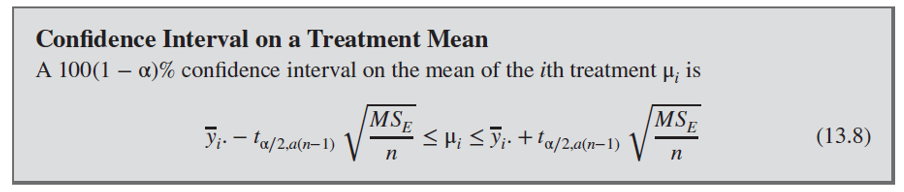)

In [49]:
# critical value of t
from scipy.stats import t
t.ppf(0.975,20)

2.0859634472658364

In [50]:
MSE

6.508333333333333

In [51]:
np.sqrt(MSE/6)

1.041499986664533

In [52]:
# For example at group 4
# t-statistic at a(n-1) = 4(6-1) = 20 dof is 2.086

LB20=(np.mean(Twenty) - 2.086*1.04)
UB20=(np.mean(Twenty) + 2.086*1.04)
print("LB =", LB20, "to UP = ", UB20)

LB = 18.99722666666667 to UP =  23.336106666666666


In [53]:
LB5=(np.mean(Five) - 2.086*1.04)
UB5=(np.mean(Five) + 2.086*1.04)
LB10=(np.mean(Ten) - 2.086*1.04)
UB10=(np.mean(Ten) + 2.086*1.04)
LB15=(np.mean(Fifteen) - 2.086*1.04)
UB15=(np.mean(Fifteen) + 2.086*1.04)
LB20=(np.mean(Twenty) - 2.086*1.04)
UB20=(np.mean(Twenty) + 2.086*1.04)

Text(0.5, 0, '95% CI of Tensile Strength')

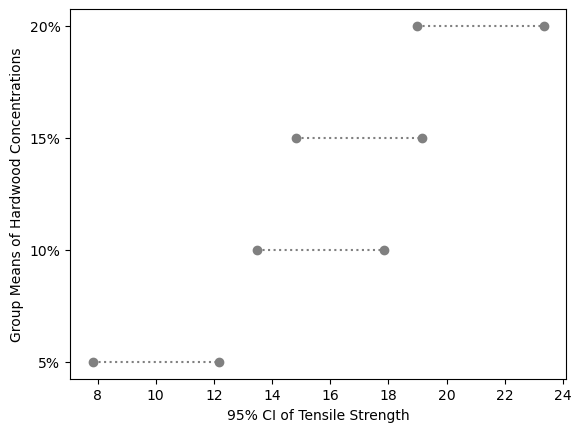

In [54]:
xvalues5=[LB5,UB5]
yvalues5=["5%", "5%"]
xvalues10=[LB10,UB10]
yvalues10=["10%","10%"]
xvalues15=[LB15,UB15]
yvalues15=["15%","15%"]
xvalues20=[LB20,UB20]
yvalues20=["20%","20%"]
plt.plot(xvalues5, yvalues5,":",color="grey",marker="o");
plt.plot(xvalues10, yvalues10,":",color="grey",marker="o");
plt.plot(xvalues15, yvalues15,":",color="grey",marker="o");
plt.plot(xvalues20, yvalues20,":",color="grey",marker="o");
plt.ylabel("Group Means of Hardwood Concentrations")
plt.xlabel("95% CI of Tensile Strength")

# Constructing confidence intervals around the difference of two means, LSD

Create 95% CI around the difference of 2 means using sqrt(2MSE/n)

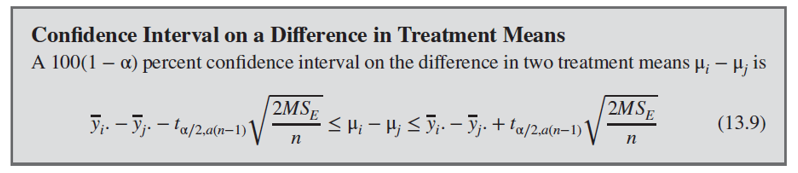

In [55]:
# For example, the difference in means bwteeen group mean 3 and group mean 2

diffmean= np.mean(Fifteen)-np.mean(Ten)
diffmean

1.333333333333334

In [56]:
SEMdiff= np.sqrt(2*MSE/6)
SEMdiff

1.47290340635238

In [57]:
diffLB=(diffmean - 2.086*1.47)
diffUB=(diffmean + 2.086*1.47)
print("LB =", diffLB, "to UB = ", diffUB)

LB = -1.733086666666666 to UB =  4.399753333333334


# Least Significant Difference 

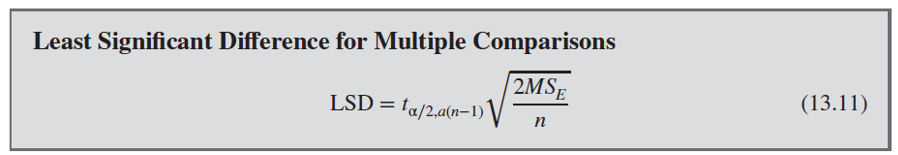

Find the LSD and use it to compare to the differences between group means.  If any treatment averages differ by more than this, this implies that the corresponding pair of treatment means are different.  

In [58]:
LSD = 2.086*1.47
LSD

3.06642

In [59]:
diffmean12= np.mean(Ten)-np.mean(Five)
diffmean13= np.mean(Fifteen)-np.mean(Five)
diffmean14= np.mean(Twenty)-np.mean(Five)
diffmean23= np.mean(Fifteen)-np.mean(Ten)
diffmean24= np.mean(Twenty)-np.mean(Ten)
diffmean34= np.mean(Twenty)-np.mean(Fifteen)

In [60]:
# For example, the difference in means compared with the LSD
# Only the comparison between group 2 and 3 is not different

print("The difference in means between group 1 and 2 is = ", round(diffmean12,2), "which is compared to the LSD of ", round(LSD,2))
print("The difference in means between group 1 and 3 is = ", round(diffmean13,2), "which is compared to the LSD of ", round(LSD,2))
print("The difference in means between group 1 and 4 is = ", round(diffmean14,2), "which is compared to the LSD of ", round(LSD,2))
print("The difference in means between group 2 and 3 is = ", round(diffmean23,2), "which is compared to the LSD of ", round(LSD,2))
print("The difference in means between group 2 and 4 is = ", round(diffmean24,2), "which is compared to the LSD of ", round(LSD,2))
print("The difference in means between group 3 and 4 is = ", round(diffmean34,2), "which is compared to the LSD of ", round(LSD,2))


The difference in means between group 1 and 2 is =  5.67 which is compared to the LSD of  3.07
The difference in means between group 1 and 3 is =  7.0 which is compared to the LSD of  3.07
The difference in means between group 1 and 4 is =  11.17 which is compared to the LSD of  3.07
The difference in means between group 2 and 3 is =  1.33 which is compared to the LSD of  3.07
The difference in means between group 2 and 4 is =  5.5 which is compared to the LSD of  3.07
The difference in means between group 3 and 4 is =  4.17 which is compared to the LSD of  3.07


# graphing the difference in means with 95% CI

In [61]:
LB12=(diffmean12 - LSD)
UB12=(diffmean12 + LSD)
LB13=(diffmean13 - LSD)
UB13=(diffmean13 + LSD)
LB14=(diffmean14 - LSD)
UB14=(diffmean14 + LSD)
LB23=(diffmean23 - LSD)
UB23=(diffmean23 + LSD)
LB24=(diffmean24 - LSD)
UB24=(diffmean24 + LSD)
LB34=(diffmean34 - LSD)
UB34=(diffmean34 + LSD)

Text(0.5, 0, '95% CI of Tensile Strength')

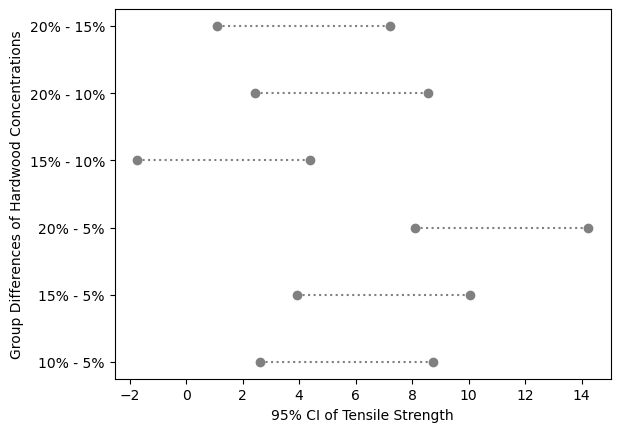

In [62]:
xvalues12=[LB12,UB12]
yvalues12=["10% - 5%","10% - 5%"]
xvalues13=[LB13,UB13]
yvalues13=["15% - 5%", "15% - 5%"]
xvalues14=[LB14,UB14]
yvalues14=["20% - 5%", "20% - 5%"]
xvalues23=[LB23,UB23]
yvalues23=["15% - 10%", "15% - 10%"]
xvalues24=[LB24,UB24]
yvalues24=["20% - 10%", "20% - 10%"]
xvalues34=[LB34,UB34]
yvalues34=["20% - 15%", "20% - 15%"]
plt.plot(xvalues12, yvalues12,":",color="grey",marker="o");
plt.plot(xvalues13, yvalues13,":",color="grey",marker="o");
plt.plot(xvalues14, yvalues14,":",color="grey",marker="o");
plt.plot(xvalues23, yvalues23,":",color="grey",marker="o");
plt.plot(xvalues24, yvalues24,":",color="grey",marker="o");
plt.plot(xvalues34, yvalues34,":",color="grey",marker="o");
plt.ylabel("Group Differences of Hardwood Concentrations")
plt.xlabel("95% CI of Tensile Strength")

# Bonferroni correction

In [63]:
dfA=pd.concat([Strengths,Groups],axis='columns')
dfA

,strengths,groups
0,7,5
1,8,5
2,15,5
3,11,5
4,9,5
5,10,5
6,12,10
7,17,10
8,13,10
9,18,10


In [64]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(dfA['strengths'], dfA['groups'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "bonf")

tbl

group1,group2,stat,pval,pval_corr,reject
5,10,-3.4847,0.0059,0.0353,True
5,15,-5.1235,0.0004,0.0027,True
5,20,-7.0703,0.0,0.0002,True
10,15,-0.9818,0.3494,1.0,False
10,20,-3.498,0.0057,0.0345,True
15,20,-3.2009,0.0095,0.0569,False


In [65]:
stats.ttest_ind(df["5"],df["10"])

TtestResult(statistic=-3.484660262185848, pvalue=0.0058752293265014795, df=10.0)